# Continuous Control

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
import pickle

Let's start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`


In [2]:
env = UnityEnvironment(file_name='./environment/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the agent

In [5]:
from src.agent import Agent
from src.config import Config

configs = [
    Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),
    Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),

    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1),
    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=2e-4, lr_critic=2e-4, noise_sigma=0.1),
    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1),
    #Config(batch_size=128, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[256,128], critic_hidden_units=[128,64], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[400,300,200], critic_hidden_units=[400,300,200], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),
    #Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[400,300], critic_hidden_units=[400,300], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True)
    Config(batch_size=256, use_per=True, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True)
]

configs = [
    Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),
    Config(batch_size=256, use_per=True, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.1, use_bn=True),
    Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.2, use_bn=True),
    Config(batch_size=256, use_per=True, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.2, use_bn=True),
        Config(batch_size=256, use_per=False, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.05, use_bn=True),
    Config(batch_size=256, use_per=True, add_noise=True, actor_hidden_units=[300,400], critic_hidden_units=[300,400], lr_actor=3e-4, lr_critic=3e-4, noise_sigma=0.05, use_bn=True)
]
agents = [
    Agent(id=i, state_size=33, action_size=4, config=config) for i, config in enumerate(configs)]

In [6]:
def run_experiment(agent, n_episodes=300, max_t=1000, stop_if_solved=True, abort_threshold=None):
    """DDPG training.
    
    Params
    ======
        agent (Agent): the DDPG agent
        starting_episode (int):  the starting episode number
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        stop_if_solved (boolean): true, if training has to stop when the agent solved the environment
        abort_threshold (int): abort training if the agent has scored high enough untis this episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores 

    # beta is only used by agents using PER

    beta_min = 0.4
    def next_beta(t):
        return min(1.0, beta_min + t * (1.0 - beta_min) / max_t)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            beta = next_beta(t)
            agent.step(state, action, reward, next_state, done, beta)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if abort_threshold != None and i_episode > abort_threshold and np.mean(scores_window) < 13.0:
            print("Aborted\n")
            break
        if np.mean(scores_window)>=30.0:
            if stop_if_solved:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                break
            
    torch.save(agent.actor_local.state_dict(), 'agent_{}_actor_{}.pth'.format(agent.getId(), i_episode-100))
    torch.save(agent.critic_local.state_dict(), 'agent_{}_critical_{}.pth'.format(agent.getId(), i_episode-100))
    with open('agent_{}_{}.txt'.format(agent.getId(), i_episode-100), 'w') as f:
        f.write(agent.summary())
        
    return scores

In [7]:
scores = []
for i, agent in enumerate(agents):
    print('\nRunning experiment with agent #{}\n'.format(agent.getId()))
    print(agent.summary()+"\n")
    scores.append(run_experiment(agent, n_episodes=300))

pickle.dump(scores, open('scores.dump', 'wb'))


Running experiment with agent #0

DDPG Agent 0:
Config(buffer_size=1000000, batch_size=256, gamma=0.99, tau=0.001, lr_actor=0.0003, lr_critic=0.0003, weight_decay=0, random_seed=50, update_n_step=4, actor_hidden_units=[300, 400], critic_hidden_units=[300, 400], add_noise=True, noise_mu=0.0, noise_theta=0.15, noise_sigma=0.1, use_per=False, per_alpha=0.6, per_beta=0.4, per_epsilon=1e-05, use_bn=True)Actor(
  (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=300, bias=True)
    (1): Linear(in_features=300, out_features=400, bias=True)
    (2): Linear(in_features=400, out_features=4, bias=True)
  )
)Critic(
  (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=300, bias=True)
    (1): Linear(in_features=304, out_features=400, bias=True)
    (2): Linear(in_features=400, out_features

KeyboardInterrupt: 

In [8]:
env.close()

In [15]:
sc = scores[1]
sc = sc + sc[-50:] # for plotting only

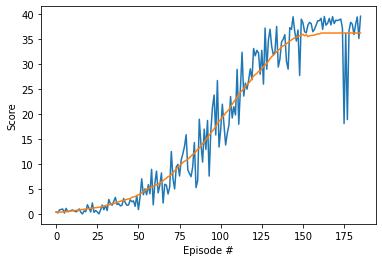

In [17]:
# plot the best scores
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

fig = plt.figure()
ax = fig.add_subplot(111)
window = 50
plt.plot(np.arange(len(sc)-window), sc[:-window])
plt.plot(np.arange(len(sc)-window), movingaverage(sc,window)[:-window])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()